In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from collections import Counter

In [5]:
# generate a simple synthetic dataset
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1,
    random_state=42
)
print("Shape of X:", X.shape)

Shape of X: (300, 2)


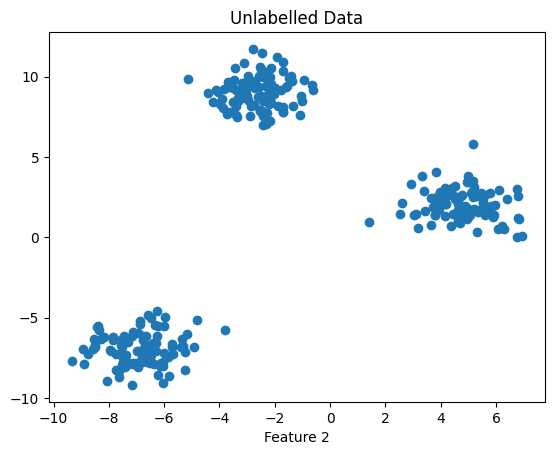

In [9]:
# visualise the data
plt.figure()
plt.scatter(X[:, 0],
            X[:, 1])
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title("Unlabelled Data")
plt.show()

In [22]:
# Fit k-means with k = 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_
centres = kmeans.cluster_centers_
print("Cluster centres:\n", centres)

Cluster centres:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]


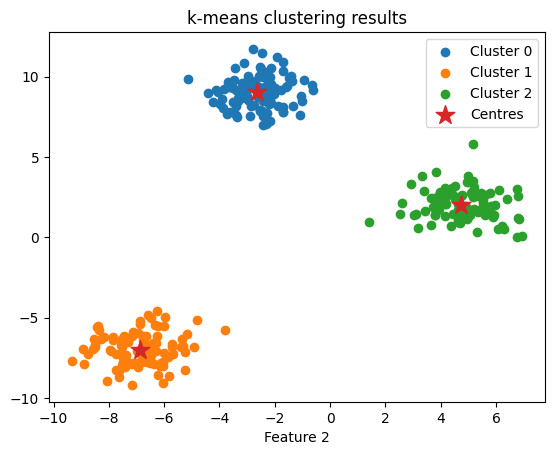

In [23]:
plt.figure()
for cluster_id in np.unique(cluster_labels):
    cluster_points = X[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0],
                cluster_points[:, 1],
                label=f"Cluster {cluster_id}")
plt.scatter(centres[:, 0],
            centres[:, 1],
            marker="*",
            s=200,
            label="Centres")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.title("k-means clustering results")
plt.legend()
plt.show()

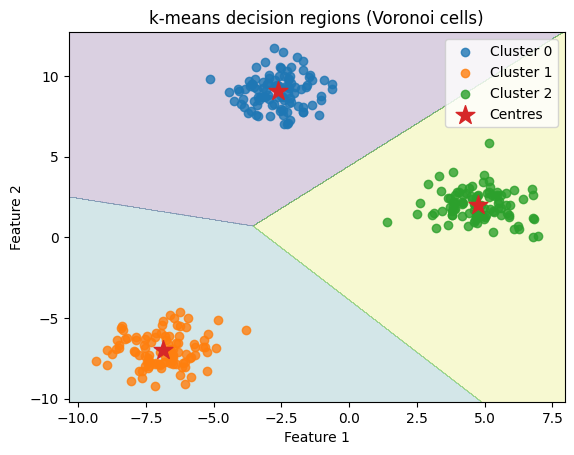

In [25]:
# Visualise k-means decision regions (boundaries) in 2D

# Step 1: create a grid covering the feature space
h = 0.02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Step 2: assign each grid point to the nearest cluster
Z = kmeans.predict(grid_points)
Z = Z.reshape(xx.shape)

# Step 3: plot decision regions and actual data
plt.figure()

# Decision regions (each integer label -> one region)
plt.contourf(xx, yy, Z, alpha=0.2)

# Plot the original points, coloured by their cluster label
for cluster_id in np.unique(kmeans.labels_):
    cluster_points = X[kmeans.labels_ == cluster_id]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f"Cluster {cluster_id}",
        alpha=0.8,
    )

# Plot cluster centres
centres = kmeans.cluster_centers_
plt.scatter(
    centres[:, 0],
    centres[:, 1],
    marker="*",
    s=200,
    label="Centres",
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-means decision regions (Voronoi cells)")
plt.legend()
plt.show()

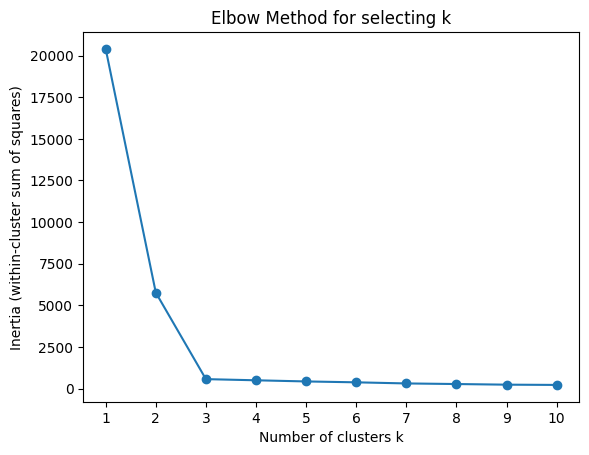

In [24]:
K = range(1, 11)
inertias = []

for k in K:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    kmeans_k.fit(X)
    inertias.append(kmeans_k.inertia_)

plt.figure()
plt.plot(list(K), inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method for selecting k")
plt.xticks(list(K))
plt.show()